# 1

## 1.1.a

### Step 1: Probability distribution of y
As $\varepsilon$ follows the normal distribution, the conditional distribution of y given x is:

$$
y \mid x \sim \mathcal{N} \left( \theta_0 + \theta_1 x + \dots + \theta_P x^P, \sigma^2 \right)
$$

The probability density function (PDF) for a normal distribution is:

$$
p(y \mid x, \theta, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y - \mu(x))^2}{2\sigma^2} \right)
$$

Where $\mu(x)$ is the predicted value:

$$
\mu(x) = \theta_0 + \theta_1 x + \dots + \theta_P x^P.
$$

---

### Step 2: Likelihood function

Given N independent observations $\mathbf{y} = (y_1, y_2, \dots, y_N)^T$, the likelihood function is:

$$
L(\theta, \sigma^2) = \prod_{i=1}^{N} p(y_i \mid x_i, \theta, \sigma^2)
$$

Substituting the normal PDF:

$$
L(\theta, \sigma^2) = \prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y_i - \mu(x_i))^2}{2\sigma^2} \right)
$$

---

### Step 3: Log-likelihood function

Taking the natural logarithm:

$$
\log L(\theta, \sigma^2) = \sum_{i=1}^{N} \left[ -\frac{1}{2} \log (2\pi\sigma^2) - \frac{(y_i - \mu(x_i))^2}{2\sigma^2} \right]
$$

Simplifying:

$$
\log L(\theta, \sigma^2) = -\frac{N}{2} \log (2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{N} (y_i - \mu(x_i))^2
$$

Where

$$
\mu(x_i) = \theta_0 + \theta_1 x_i + \dots + \theta_P x_i^P.
$$`

## 1.1 b 

To find the maximum likelihood estimates, we differentiate the log-likelihood with respect to each parameter $\theta_j$ and set the derivative equal to zero:

$$
\frac{\partial}{\partial \theta_j}\log L(\theta, \sigma^2) = 0
$$

We have:

$$
\frac{\partial}{\partial \theta_j}\left[ -\frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i - \mu(x_i))^2 \right] = 0
$$

Carrying out this differentiation explicitly, we get:

$$
\frac{1}{\sigma^2}\sum_{i=1}^{N}(y_i - \mu(x_i)) x_i^j = 0
$$

Since  $\sigma^2$ is positive and nonzero, we simplify to:

$$
\sum_{i=1}^{N}(y_i - \mu(x_i)) x_i^j = 0 \quad \text{for each } j=0,1,...,P
$$

This results in the linear system of equations (normal equations):

$$
\sum_{i=1}^{N}\left(y_i - (\theta_0 + \theta_1 x_i + \dots + \theta_P x_i^P)\right)x_i^j = 0 \quad \text{for each } j=0,1,\dots,P.
$$

In matrix form, this solution can be expressed as:

$$
\hat{\theta} = (X^TX)^{-1}X^Ty
$$

where $X$ is the design matrix containing the polynomial terms.



## 1.1 c 

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


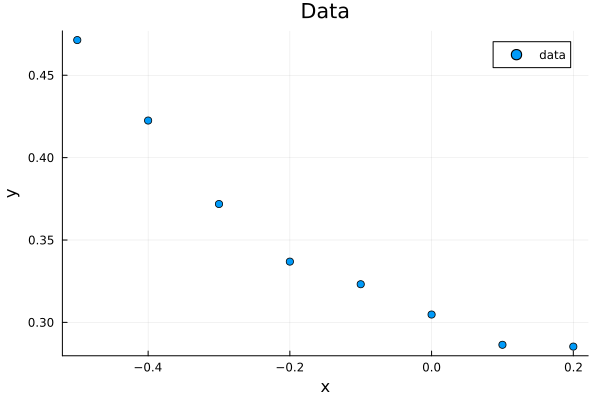

In [78]:
import Pkg
Pkg.add("Plots")
using Plots

theta_0 = 0.3
theta_1 = -0.1
theta_2 = 0.5
variance = 0.0001
standard_deviation = sqrt(variance)

function get_y_for_noisy_x(start, step, stop, seed)
    x = start:step:stop
    Random.seed!(seed)
    epsilon = randn(length(x))
    y = theta_0 .+ theta_1*x .+ theta_2*x.^2 .+ standard_deviation*epsilon
    return x, y
end

x, y = get_y_for_noisy_x(-0.5, 0.1, 0.2, 42)

scatter(x, y, label="data", xlabel="x", ylabel="y", title="Data")

## 1.1 d

In [79]:
# Helper function: create design matrix for polynomial of order P
function design_matrix(xvals, P)
    # X will have columns [1, x, x^2, ..., x^P]
    X = [xi^p for xi in xvals, p in 0:P]
    return X
end

# Compute ML estimate \hat{theta} via normal equations and log-likelihood
function ml_estimate(xvals, yvals, P)
    X = design_matrix(xvals, P)
    # ML parameter estimate using least squares
    theta_hat = (X'X) \ (X'yvals)

    # Fitted values
    y_hat = X * theta_hat

    # Residual sum of squares (RSS)
    rss = sum((yvals .- y_hat).^2)

    # Estimate of sigma^2 is RSS / N in the ML setting
    sigma2_hat = rss / length(yvals)

    # Log-likelihood under Gaussian noise
    # L = -N/2 * log(2πσ_hat^2) - RSS/(2σ_hat^2)
    N = length(yvals)
    logL = -N/2 * log(2*π*sigma2_hat) - (rss / (2*sigma2_hat))

    return theta_hat, logL
end

# compute estimates and log-likelihoods for P=1, P=2, P=7
P_values = [1, 2, 7]
estimates = [ml_estimate(x, y, P) for P in P_values]

# print the estimates and log-likelihoods for each P value
for (P, (theta_hat, logL)) in zip(P_values, estimates)
    println("P = $P: \n theta_hat = $theta_hat, \n logL = $logL")
end

P = 1: 
 theta_hat = [0.3110337761775844, -0.2616609998063137], 
 logL = 20.370068473796504
P = 2: 
 theta_hat = [0.2989707156453031, -0.14103039448350063, 0.4021020177427102], 
 logL = 31.906868731470468
P = 7: 
 theta_hat = [0.30476738379758656, -0.2368543981158541, -0.18489584126846328, 6.047347671734099, 22.01155648107655, -70.91447860162138, -335.8241179875408, -320.738095206558], 
 logL = 213.78928966495124


The first three parameters of $\theta$ are closest to their true values when the number of parameters is the same as in the original function. The function with only 2 parameters is underfitting and the function with 7 parameters is overfitting.

The log-likelihood is increasing with the number of parameters. This is an indicator that, for noisy data, if the data is too likely to have been generated by the model, the model is likely overfitting.

## 1.1 e

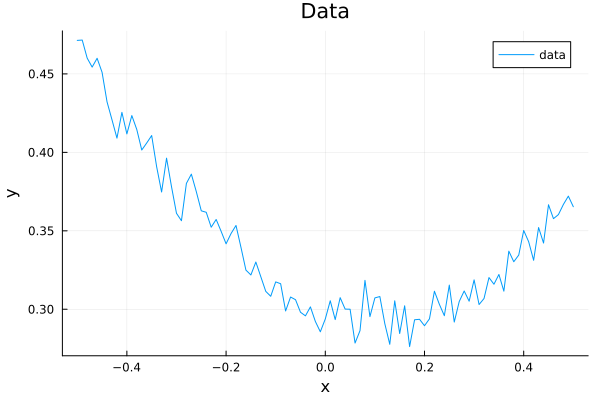

In [80]:
x_new, y_new = get_y_for_noisy_x(-0.5, 0.01, 0.5, 42)

plot(x_new, y_new, label="data", xlabel="x", ylabel="y", title="Data")

In [86]:
# calculate the log-likelihood for the new data under the ML parameter estimates obtained in (d) for P = 1,2 and 7
function log_likelihood_for_specific_params(xvals, yvals, theta_hat)
    P = length(theta_hat) - 1
    N = length(yvals)
    # estimates
    y_hat = design_matrix(xvals, P) * theta_hat

    # RSS
    rss = sum((yvals .- y_hat).^2)

    # sigma^2
    sigma2_hat = rss / N
    
    # log-likelihood
    logL = -N/2 * log(2*π*sigma2_hat) - (rss / (2*sigma2_hat))

    return logL
end

for (P, (theta_hat, logL)) in zip(P_values, estimates)
    println("P = $P: \n logL = $(log_likelihood_for_specific_params(x_new, y_new, theta_hat))")
end

P = 1: 
 logL = 129.71750005301888
P = 2: 
 logL = 264.3661760330142
P = 7: 
 logL = -191.69629110932362


Fitting the previous parameters to a wider range on the x-axis and a smaller step size one can observe the generelisability of the different models. The model with P=2 is not by far the most likely to have generated the data. P=7, which fit the noise quite well on a shorter scale is now a fairly bad model because outside the range of the previous data it deviates significantly from the original quadratic function. 

Plotting the graphs of the different fits and the newly generated data this can be seen fairly easily:

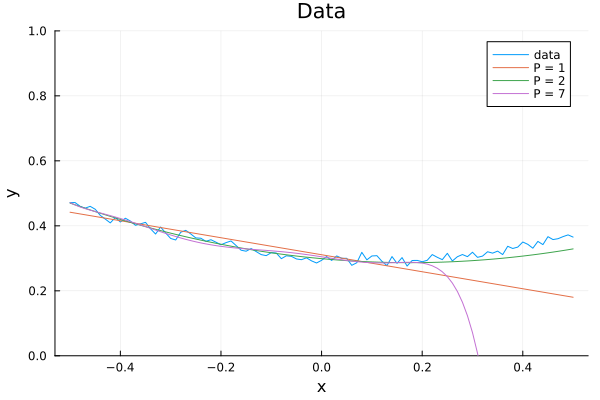

In [87]:
# plot the data and each of the fitted polynomials, keep the y-axis at 0 - 1
plot(x_new, y_new, label="data", xlabel="x", ylabel="y", title="Data", ylims=(0, 1))
for (P, (theta_hat, logL)) in zip(P_values, estimates)
    y_hat = design_matrix(x_new, P) * theta_hat
    plot!(x_new, y_hat, label="P = $P")
end
plot!()

# 2

# 3